## Summarizing distributions

In this notebook we will look into summarizing distributions using measures of central tendency and variability. 

It is important to understand how a variable is distributed before using the variable to fit a model.
Some of the basic summerizing metrics we will look into are measures of central tendency (mean, median, mode), measures of variability (standard deviation, variance), and percentiles.


### Central Tendency

In [1]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")

male <- subset(bdims, sex == 1)
female <- subset(bdims, sex == 0)

In [38]:
#Mean of the Men's height
mean(male$hgt)

#Median of the Men's height
median(male$hgt)

#R doesn't have a built in function for mode.
## Create mode function
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

## Create vector with numbers
v <- c(male$hgt)
##print(v)
## Calculate mode using function
mode <- getmode(v)

# ## Create vector with characters
# charv <- c("o","it","the","it","it")

# # Calculate mode using function
# mode <- getmode(charv)
# print(mode)

mode = mode
print(mode)

[1] 177.7453

[1] 177.8

[1] 177.8


In [39]:
paste('mean:',mean(male$hgt))

paste("median:",median(male$hgt))

paste("mode:", mode)

[1] "mean: 177.745344129555"

[1] "median: 177.8"

[1] "mode: 177.8"

### Measures of Variability

In [4]:
#standard deviation of the Men's height
sd(male$hgt)

#Variance of the Men's height
var(male$hgt)

#Range of the Men's height gives lowest and highest values in distribution
range(male$hgt)

[1] 7.183629

[1] 51.60452

[1] 157.2 198.1

In [5]:
paste("standard deviation:",sd(male$hgt))

paste('variance:',var(male$hgt))

paste('Range:',range(male$hgt))

[1] "standard deviation: 7.18362867342674"

[1] "variance: 51.6045209176788"

[1] "Range: 157.2" "Range: 198.1"

### Percentiles

A percentile is a measure indicating the value below which a given percentage of observations in a group of observations fall. 
For example, the 20th percentile is the value (or score) below which 20% of the observations may be found.

We apply the R `quantile` function to compute the percentiles with the desired percentage ratios.

**Note**: the name quantile comes from the prevalent use of the 25% and 75% quartiles in statistics.

In [6]:
quantile(male$hgt, c(.20, .40, .90))

20%    40%    90% 
171.50 175.94 188.00

## Shapes of Distribution - Measure of center and Measure of spread

Understanding the shape of a distribution is an important part of any initial exploratory data analysis.
Along with descriptive statistics like mean, standard deviation, skewness, etc. and using graphical techniques like histograms, understanding shape tells us which kind of probability density function to use to fit the model.
Histograms provide information about multi-modal behaviour, skewness and behavior in tails. 
Here we are just dealing with normal distributions of data. 

The following link is available to explore different kinds of distributions. 
 * https://cran.r-project.org/doc/contrib/Ricci-distributions-en.pdf

We will generate some random samples for normal distribution using R statements and then plot histograms. 
Imagine we have a sample size of n=200 from a normal population whose **mean=10** and **standard deviation=2**.


### Analyzing shape of distribution and measure of center

In [7]:
x.norm<-rnorm(n=200,m=10,sd=2)

In the following code cells, we will preview some data, look at some plots of the sample and plots of the model.
Please read the code carefully to understand how the lines of code contribute to the visual elements.

In [8]:
head(x.norm, 25)

[1]  8.961536  8.126031  9.191900 11.033005  9.215681 12.118749 11.606929
 [8]  9.632254  9.679276 11.000085  9.687444  9.719772  5.422365  7.796654
[15]  9.487221 11.094095  8.222549 12.291153 14.249997 10.539645 10.725394
[22] 10.336379  8.234541 10.701092 12.824096

In [9]:
#calculate mean, median and sd to show them on the graph
mean_norm <- mean(x.norm)
median_norm = median(x.norm)
sd_norm_pos <- mean(x.norm) + sd(x.norm)   # This is the positive first standard deviation
sd_norm_neg <- mean(x.norm) - sd(x.norm)   # This is the negative first standard deviation

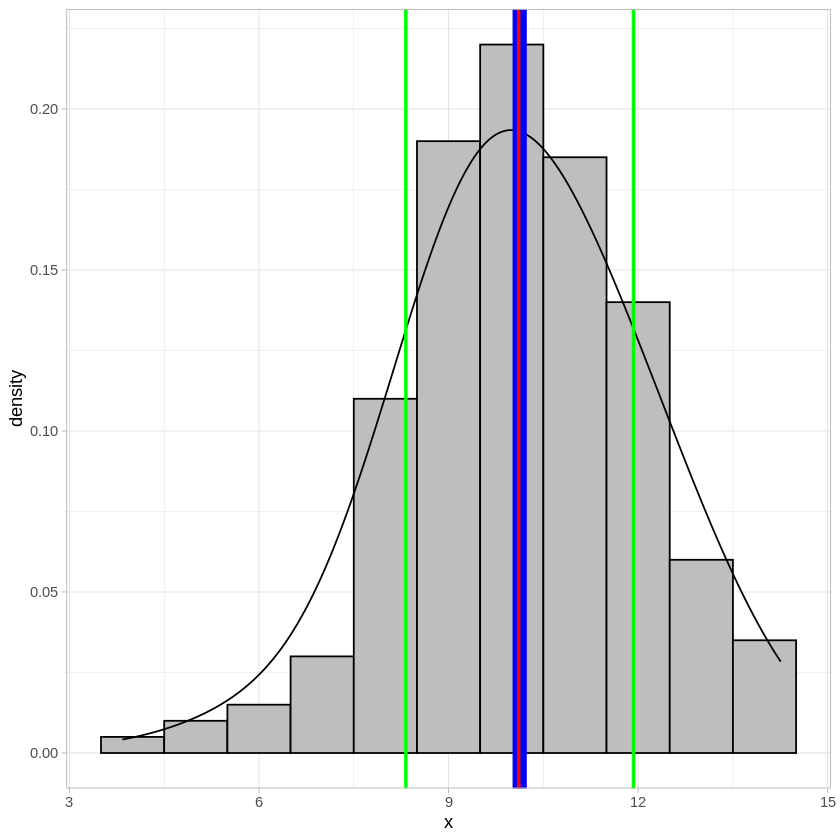

In [10]:
library(ggplot2)

df <- data.frame(x=x.norm)

p <- ggplot(df, aes(x=x)) + geom_histogram(aes(y=..density..),binwidth=1,fill="gray", color="black") + geom_density(adjust=2)
p <- p + geom_vline(xintercept=mean_norm, color="blue", size=4)
p <- p + geom_vline(xintercept=median_norm, color="red", size=1)
p <- p + geom_vline(xintercept=sd_norm_pos, color="green", size=1)
p <- p + geom_vline(xintercept=sd_norm_neg, color="green", size=1) + theme_light() 

p

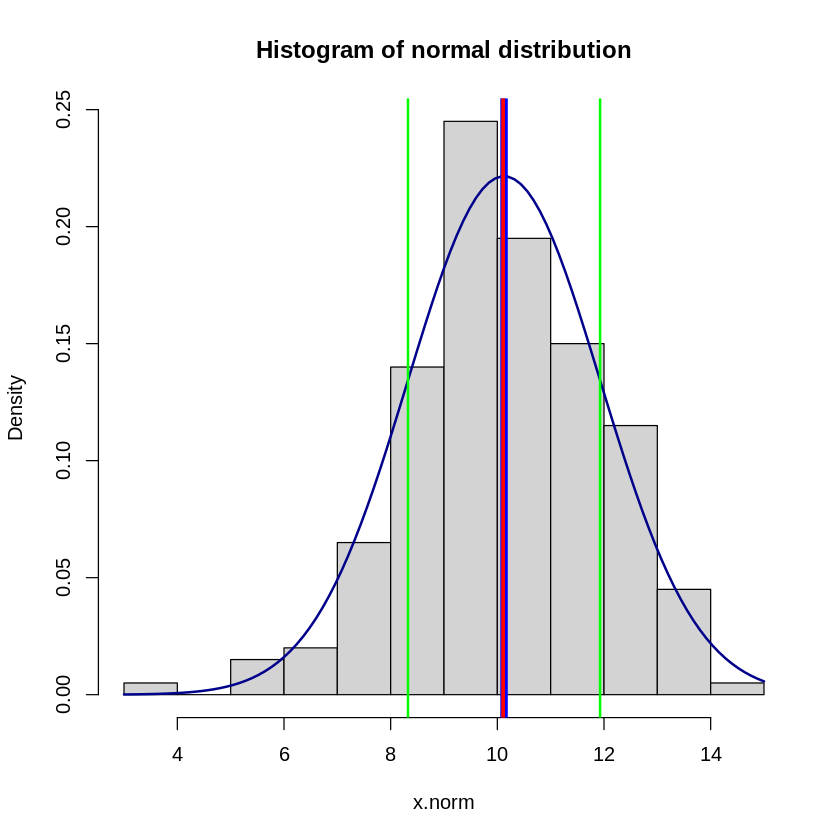

In [11]:
#Since the prob=TRUE, we will be plotting a density plot. The y-axis represents probability density of corresponding x values
hist(x.norm,prob=TRUE,main="Histogram of normal distribution")
#curve draws a curve corresponding to a function over the interval specified
#dnorm function gives the density
curve(dnorm(x, mean(x.norm), sd(x.norm)), add=TRUE, col="darkblue", lwd=2)

#abline() will draw a vertical line on the graph at the specified x value. 
abline(v = mean_norm, col = "blue", lwd =6) # draw a thick blue line at the sample mean value
abline(v = median_norm, col = "red", lwd = 3) # draw a thinner red line for median.  Notice it overlaps the mean

# Lines for the positive and negative first standard deviation
abline(v = sd_norm_pos, col = "green", lwd = 2)
abline(v = sd_norm_neg, col = "green", lwd = 2)

The histogram above represents a normal distribution of data with the mean lying around 10 and a standard deviation of 2. 
The data is aggregated close to the mean or the center and is symmetric on both sides.

In [12]:
paste('mean: ',mean(x.norm))
paste('median: ',median(x.norm))
paste('standard deviation: ',sd(x.norm))

[1] "mean:  10.1255893754812"

[1] "median:  10.1088869053212"

[1] "standard deviation:  1.80080509576306"

#### Left skewed data or negative skew

In [13]:
x.norm=sort(x.norm)
#Simulating data for plotting a left skewed distribution. We are removing the higher values from the right end of the sorted list whose 
#mean is 10 and sd is 2.
left_skewed=x.norm[1:150]

In [14]:
#The mean and median shift toward the left because the data is left skewed, but the mode does not change.
paste('mean: ',mean(left_skewed))
paste('median: ',median(left_skewed))

[1] "mean:  9.36695348489552"

[1] "median:  9.547503457705"

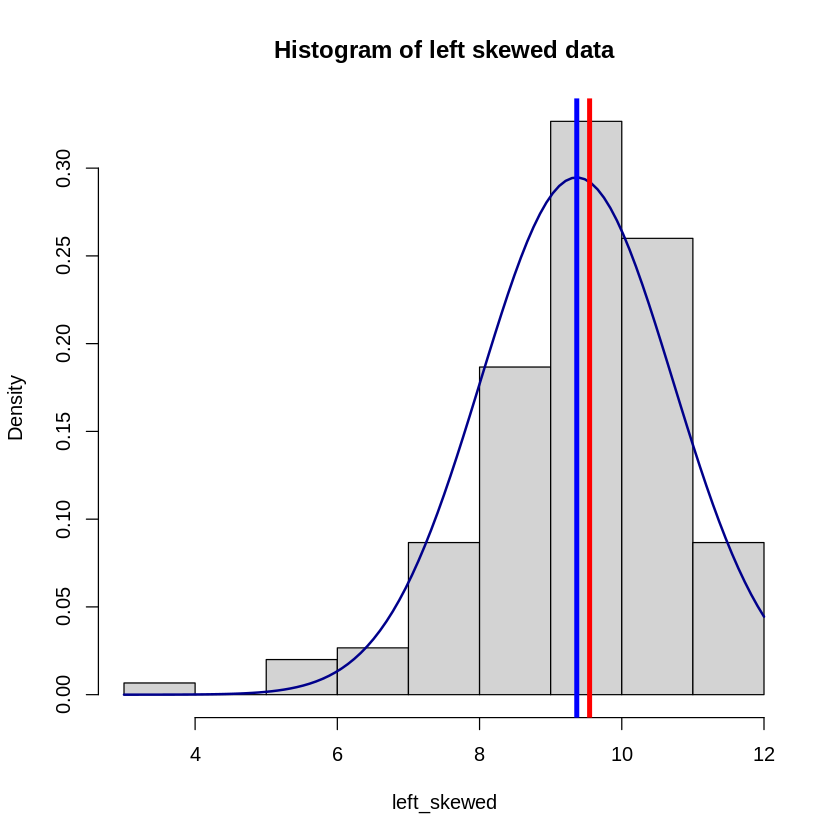

In [15]:
#We can get a histogram for this left skewed data using hist() statement

hist(left_skewed,prob=TRUE,main="Histogram of left skewed data")
curve(dnorm(x, mean(left_skewed), sd(left_skewed)), add=TRUE, col="darkblue", lwd=2)
mean_left <- mean(left_skewed)
median_left = median(left_skewed)
abline(v = mean_left, col = "blue", lwd = 4)
abline(v = median_left, col = "red", lwd = 4)

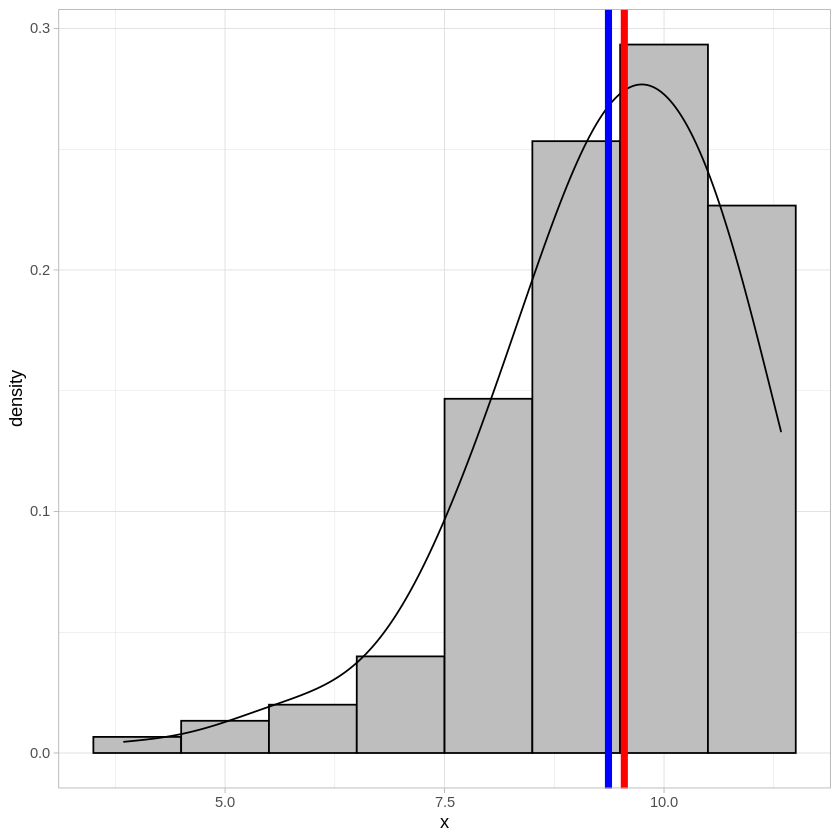

In [16]:

df2 <- data.frame(x=left_skewed)

p <- ggplot(df2, aes(x=x)) + geom_histogram(aes(y=..density..),binwidth=1,fill="gray", color="black") + theme_light() +
     geom_density(adjust=2) + 
     geom_vline(xintercept=mean(df2$x), color="blue", size=2) + geom_vline(xintercept=median(df2$x), color="red", size=2) 

p

The graph has a longer tail on the left side.  The mean and median have shifted towards the left, compared to the normal distribution. 

#### Right skewed data or positive skew

In [17]:
#Simulating data for plotting a positive skewed distribution. We are removing the lower values from the left end 
#of the sorted list whose mean is 10 and sd is 2.

right_skewed=x.norm[51:200]

In [18]:
# the mean and median is shifted towards right because the data is right skewed. 

paste('mean: ',mean(right_skewed))
paste('median: ',median(right_skewed))

[1] "mean:  10.8765204518589"

[1] "median:  10.7076829811803"

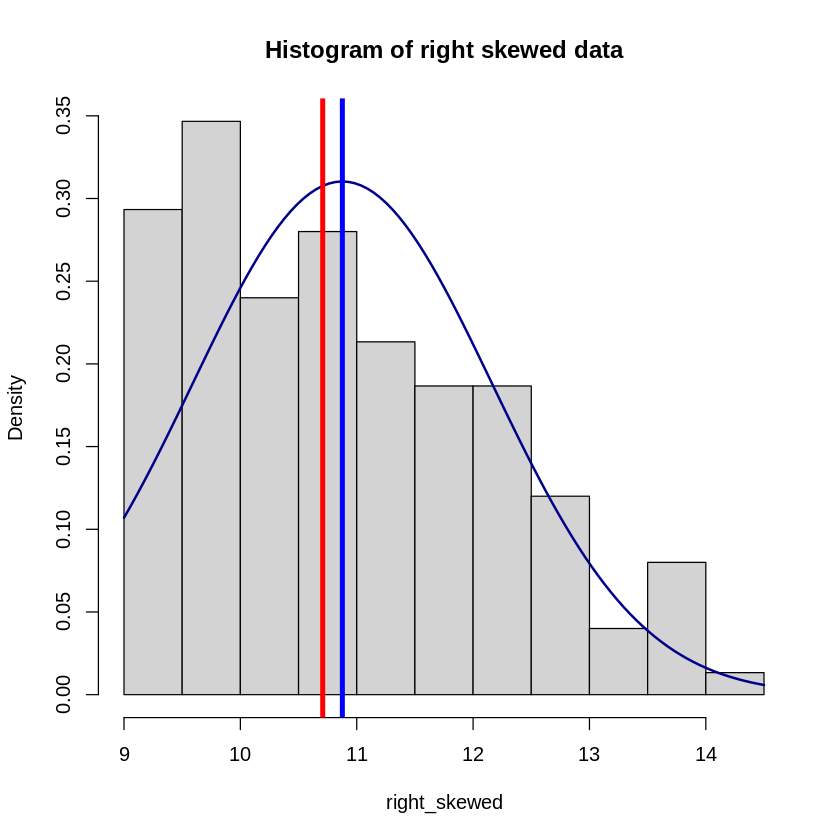

In [19]:
#Plot histogram for right skewed data

hist(right_skewed,prob=TRUE,main="Histogram of right skewed data")
curve(dnorm(x, mean(right_skewed), sd(right_skewed)), add=TRUE, col="darkblue", lwd=2)
mean_right <- mean(right_skewed)
median_right = median(right_skewed)
abline(v = mean_right, col = "blue", lwd = 4)
abline(v = median_right, col = "red", lwd = 4)

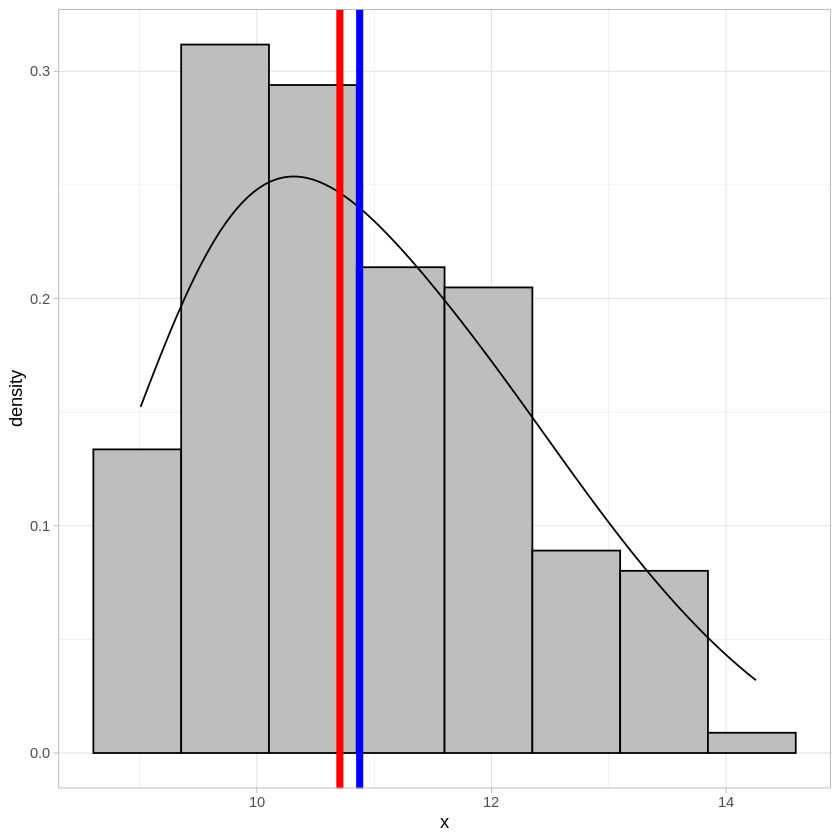

In [20]:

df2 <- data.frame(x=right_skewed)

p <- ggplot(df2, aes(x=x)) + geom_histogram(aes(y=..density..),bins=8,fill="gray", color="black") + theme_light() +
     geom_density(adjust=2) + 
     geom_vline(xintercept=mean(df2$x), color="blue", size=2) + geom_vline(xintercept=median(df2$x), color="red", size=2) 

p

If the data is normally distributed/symmetrical and not skewed in either direction, 
the _mean_ would be an ideal choice if we want to measure the center.
But if the mean is positively skewed -- the **mean** will give an overestimate of the center.  If the mean is negatively skewed, the **mean** will give an underestimate of the center. 

**mean**; and if the distribution is skewed in either direction the measure of center should be the **median**. 
The median would be the measure of the center that informs the center of distribution without being affected too much by the skew.

Likewise, standard deviation would be the choice of measure for spread when the data is normally distributed.
But when the data is skewed the curve is not symmetric anymore and the $\mu + \sigma$ and $\mu - \sigma$ doesn't represent the correct areas of distribution.


The image below shows all three kinds of distributions: 
normal, left skewed, and right skewed distributions. 
Observe how the mean shifts with skewness. 

<img src="../images/Curves_Left_and_Right_skewed.JPG"/>

When the data is left skewed, the mean shifts towards the left,
so the distribution of data  measured as 
($\mu - 3\sigma$ , $\mu - 2\sigma$ , $\mu - \sigma$ , $\mu + \sigma$ , $\mu + 2\sigma$ , $\mu + 3\sigma$) 
will give incorrect results. 
Inter-quartile range is the choice of measure of spread when data is skewed like this. 
The quartile range tells you the spread, no matter how much the data is skewed.  

Look at the distributions below when data is skewed and how mean, median, and mode shift with skewness. 

<img src="../images/left_skewed.JPG"/>


<img src="../images/right_skewed.JPG"/>

Additionally, we can observe changes in the associated quartile range marks for these three distributions.

In [21]:
# Inter-quartile range of normally distributed data

quantile(x.norm)

0%       25%       50%       75%      100% 
 3.848460  9.010388 10.108887 11.334149 14.249997

In [22]:
# Inter quartile range of left_skewed data

quantile(left_skewed)

0%       25%       50%       75%      100% 
 3.848460  8.781101  9.547503 10.323000 11.331986

In [23]:
# Inter quartile range of right_skewed data

quantile(right_skewed)

0%       25%       50%       75%      100% 
 9.011264  9.771613 10.707683 11.820380 14.249997

## Measures of Skewness

Different shapes of distributions differ in skew and/or kurtosis. 
For a highly-skewed distribution, the mean can vary more than twice the amount of the median. 
Skewness can be calculated using this simple equation (Pearson): 

<img src='../images/pearson_skew.gif'/>

### Skewness

Let's calculate the skewness of the **left-skewed** data

In [24]:
library(moments)
skewness(left_skewed)


[1] -1.081067

The skewness we got should be around -0.74
(but don't worry if it is different; it will be every time the notebook is rerun from the top). 
The negative value implies that the distribution of the data is slightly skewed to the left or negatively skewed.

Let's calculate the skewness of the **right-skewed** data

In [25]:
skewness(right_skewed)

[1] 0.539344

The skewness we got should be around 0.75, nearly opposite of what we got for left-skewed data.
The positive value implies that the distribution of the data is slightly skewed to the right or positively skewed.

**Note**: Output from the prior two cells necessarily varies due to the random number generation used when creating our initial data sample of 200.

In [26]:
auto_mpg <- read.csv("/dsa/data/all_datasets/auto-mpg/auto-mpg.csv", header = T, sep=",")
head(auto_mpg)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [27]:
dim(auto_mpg)
mean(auto_mpg$displacement)
sd(auto_mpg$displacement)

[1] 398   9

[1] 193.4259

[1] 104.2698

In [28]:
options(scipen=999)
x.norm<-rnorm(n=398,m=193.4,sd=104.2)

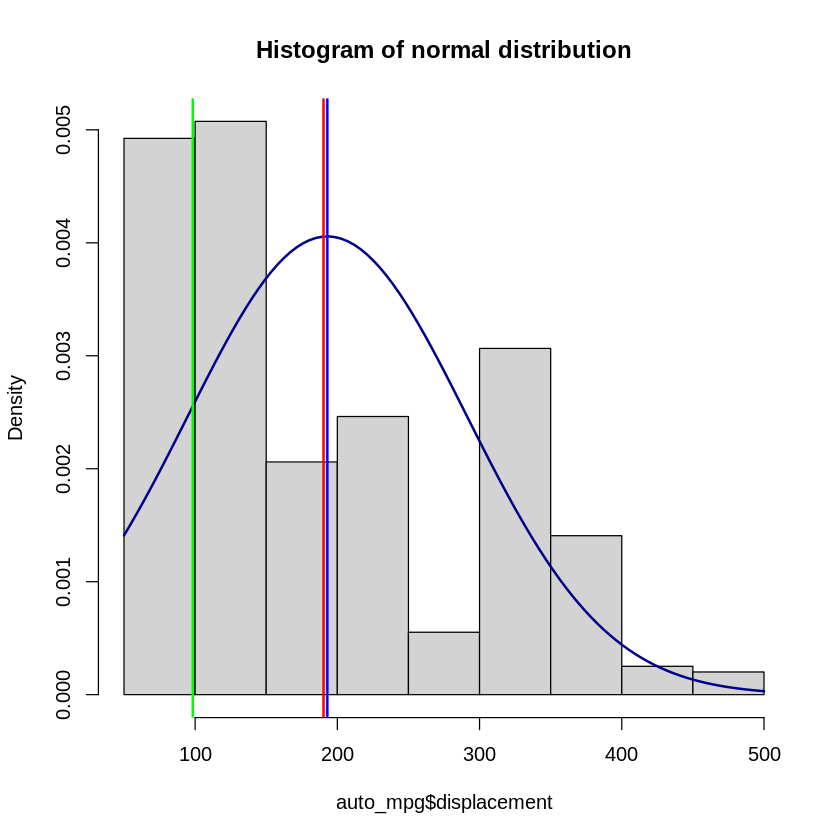

In [29]:
#Since the prob=TRUE, we will be plotting a density plot. The y-axis represents probability density of 
# corresponding x values
hist(auto_mpg$displacement,prob=TRUE,main="Histogram of normal distribution")
#curve draws a curve corresponding to a function over the interval specified
curve(dnorm(x, mean(x.norm), sd(x.norm)), add=TRUE, col="darkblue", lwd=2)

#calculate mean, median and sd to show them on the graph
mean_norm <- mean(x.norm)
median_norm = median(x.norm)
sd_norm=sd(x.norm)
#abline() will draw a vertical line on the graph at the specified x value. 
abline(v = mean_norm, col = "blue", lwd = 2)
abline(v = median_norm, col = "red", lwd = 2)
abline(v = sd_norm, col = "green", lwd = 2)

In [30]:
mean(as.numeric(auto_mpg$horsepower), na.rm=TRUE)
sd(as.numeric(auto_mpg$horsepower), na.rm=TRUE)
x.norm<-rnorm(n=398,m=51.4,sd=29.93)

Warning message in mean(as.numeric(auto_mpg$horsepower), na.rm = TRUE):
“NAs introduced by coercion”


[1] 104.4694

Warning message in is.data.frame(x):
“NAs introduced by coercion”


[1] 38.49116

Warning message in hist(as.numeric(auto_mpg$horsepower), prob = TRUE, main = "Histogram of normal distribution"):
“NAs introduced by coercion”


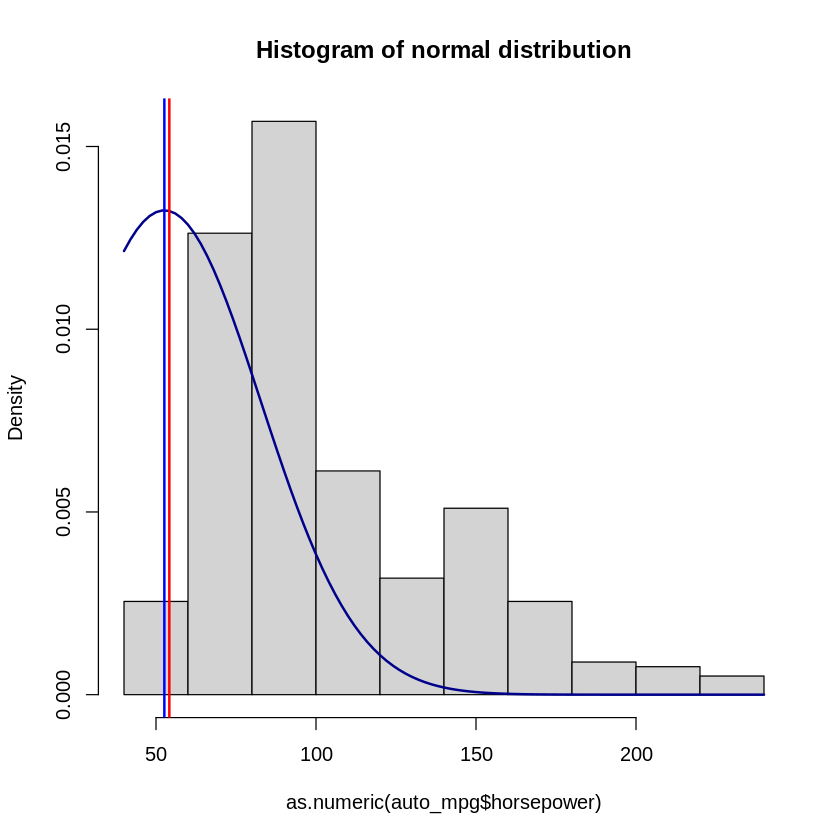

In [31]:
#Since the prob=TRUE, we will be plotting a density plot. The y-axis represents probability density of 
# corresponding x values
hist(as.numeric(auto_mpg$horsepower),prob=TRUE,main="Histogram of normal distribution")
#curve draws a curve corresponding to a function over the interval specified
curve(dnorm(x, mean(x.norm), sd(x.norm)), add=TRUE, col="darkblue", lwd=2)

#calculate mean, median and sd to show them on the graph
mean_norm <- mean(x.norm)
median_norm = median(x.norm)
sd_norm=sd(x.norm)
#abline() will draw a vertical line on the graph at the specified x value. 
abline(v = mean_norm, col = "blue", lwd = 2)
abline(v = median_norm, col = "red", lwd = 2)
abline(v = sd_norm, col = "green", lwd = 2)

### This concludes the lab on summarizing distributions.